# Logistic Regression with Scikit-learn: A Comprehensive Guide

This notebook will walk through a complete example of logistic regression using `scikit-learn`. We will cover:
1. Data exploration and preprocessing
2. Model training
3. Model evaluation (Accuracy, Classification Report, Confusion Matrix)
4. Model insights (Feature importance)
5. Learning curve visualization to understand model performance over different training sizes.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Data Exploration

We will use the popular Iris dataset for this example. First, we will load the dataset and explore its structure. This step helps us understand the data before applying any machine learning model.

In [25]:
# Load the iris dataset
iris = load_iris()

# Create a pandas DataFrame for easier data handling
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].map({i:n for i,n in enumerate(iris['target_names'])})

# Target Names
print("Target Names:")
print(iris['target_names'])

# Display first few rows of the dataset
print("\nFirst few rows of the Iris dataset:")
print(iris_df.head())

# Get basic statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(iris_df.describe())

# Check the target distribution
print("\nDistribution of target values:")
print(iris_df['target'].value_counts())


Target Names:
['setosa' 'versicolor' 'virginica']

First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  

Statistical summary of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.7

## Data Visualization

Before we proceed with modeling, it's useful to explore the dataset visually. We will plot the distribution of each feature and the relationships between them. This helps us understand how the features are distributed and whether there are any patterns that could help in classification.

<Figure size 1000x1000 with 0 Axes>

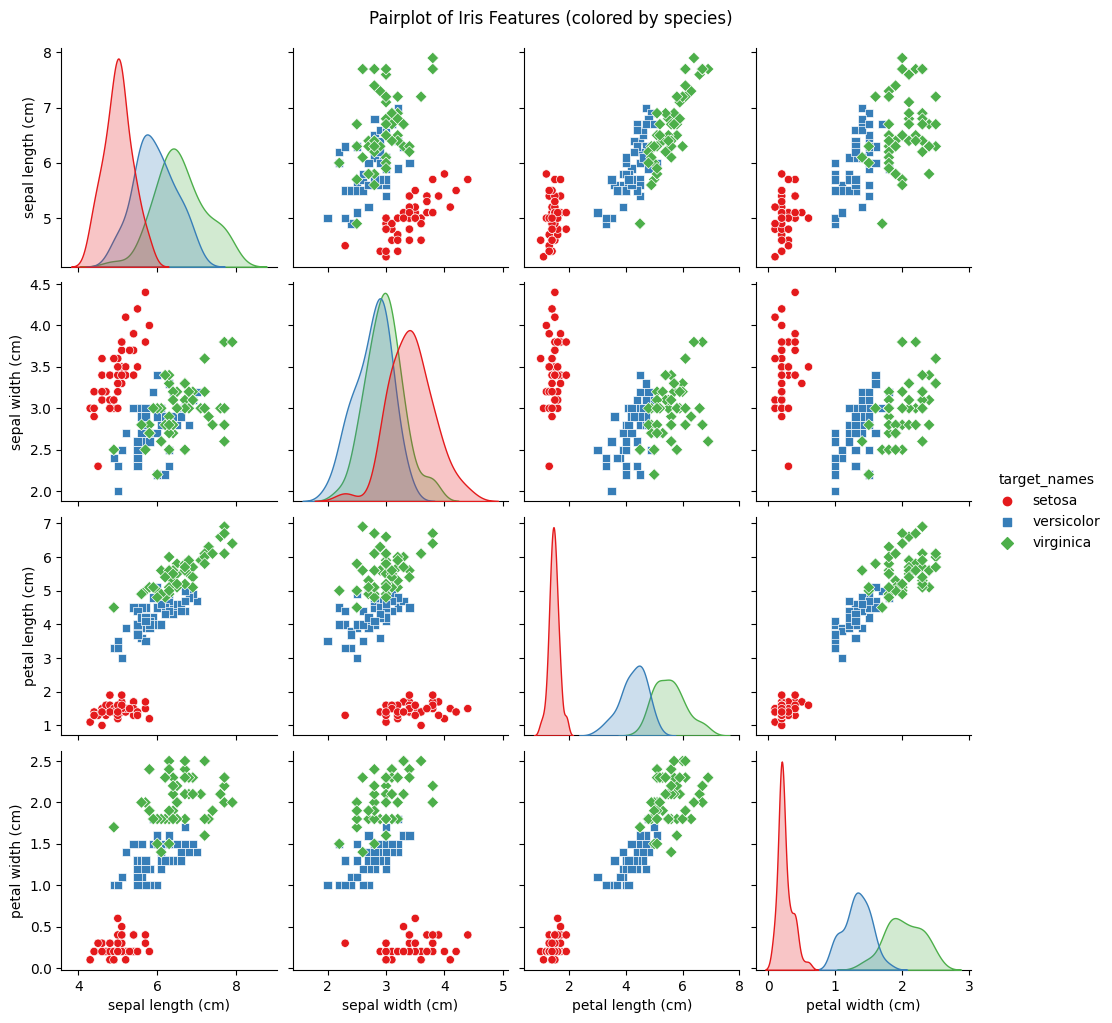

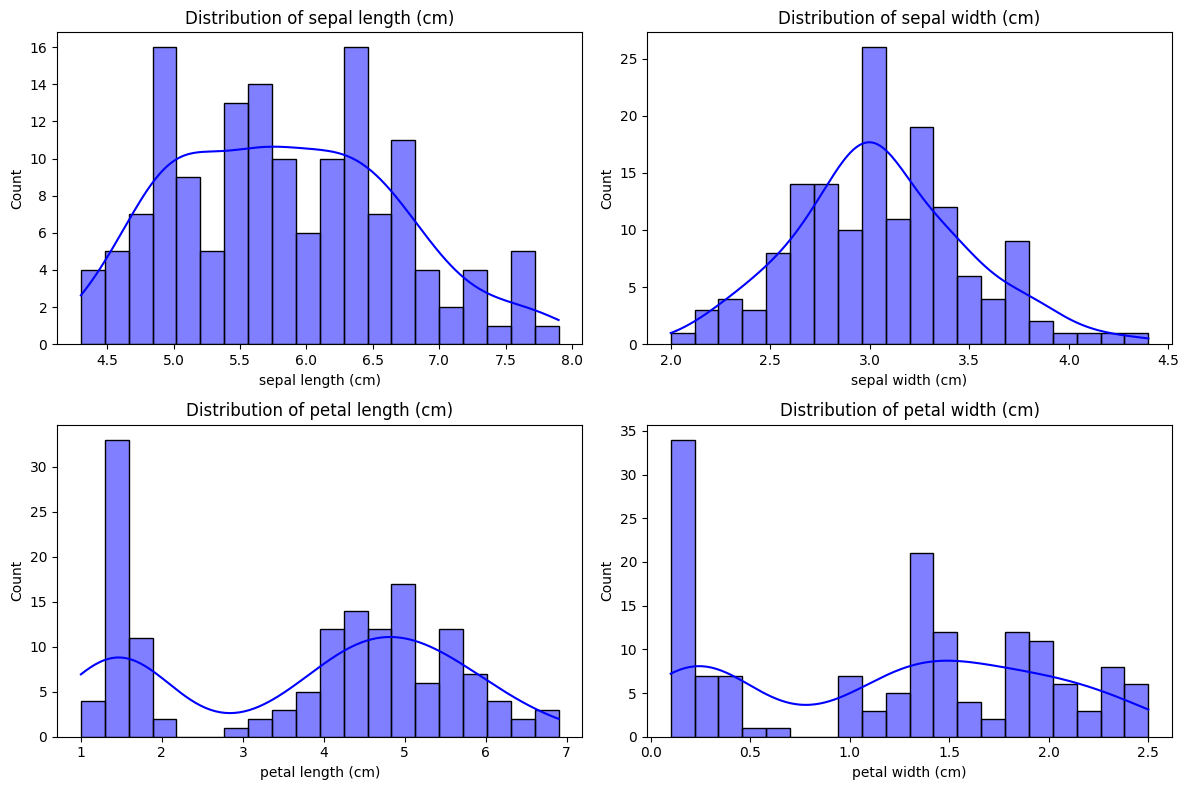

In [32]:
# Import seaborn for easier visualization
import seaborn as sns

# Pairplot to visualize relationships between features
plt.figure(figsize=(10, 10))
plot_feature = iris_df.drop('target', axis=1)
sns.pairplot(plot_feature, hue='target_names', diag_kind='kde', palette='Set1', markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Iris Features (colored by species)', y=1.02)
plt.show()

# Plot distribution of each feature
plt.figure(figsize=(12, 8))
for idx, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, idx+1)
    sns.histplot(iris_df[feature], kde=True, color='blue', bins=20)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

## 2. Data Preprocessing

For this example, we will convert the target variable to a **binary classification problem**:
- We will classify whether a flower is **Virginica** (target = 2) or not (target = 0 or 1).
- We will create a new binary column (`is_virginica`), where 1 means "Virginica" and 0 means "Not Virginica".
- Finally, we split the data into training and test sets (70% training, 30% testing).

In [43]:
# Transform the target variable to a binary problem (1 = Virginica, 0 = Non-Virginica)
iris_df['is_virginica'] = (iris_df['target'] == 2).astype(int)

# Split the dataset into features and target variable
X = iris_df.drop(['target', 'is_virginica', 'target_names'], axis=1)  # Features: All columns except 'target' and 'is_virginica'
y = iris_df['is_virginica']  # Target: Binary classification (Virginica or not)

# Split into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Model Training

We will now initialize and train a **Logistic Regression** model. The model will be trained on the training set, and we will use the test set to evaluate the model's performance.

In [44]:
# Initialize and fit the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## 4. Model Prediction and Evaluation

We will now evaluate the model using several metrics:
- **Accuracy**: The percentage of correctly predicted observations.
- **Classification Report**: Includes precision, recall, and F1-score for each class.
- **Confusion Matrix**: A matrix showing true positives, false positives, true negatives, and false negatives.


In [47]:
# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Virginica', 'Virginica']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

Not Virginica       1.00      1.00      1.00        32
    Virginica       1.00      1.00      1.00        13

     accuracy                           1.00        45
    macro avg       1.00      1.00      1.00        45
 weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[32  0]
 [ 0 13]]


## 5. Visualizing the Confusion Matrix

We will now visualize the confusion matrix to get a better understanding of how the model performed across different classes.

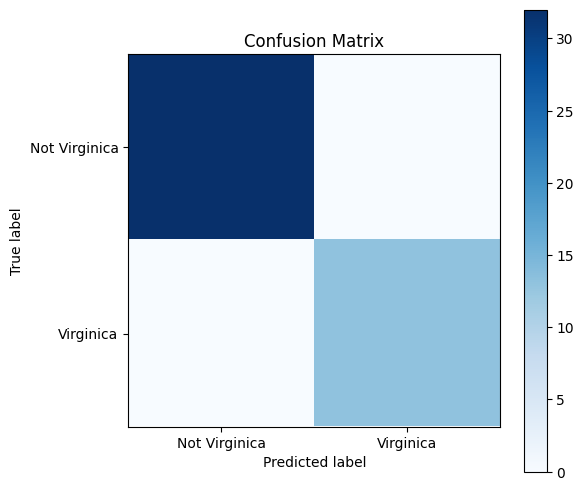

In [48]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='none')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Virginica', 'Virginica'])
plt.yticks([0, 1], ['Not Virginica', 'Virginica'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 6. Model Insights

Logistic Regression provides **coefficients** for each feature, which can be interpreted as the feature's contribution to the prediction. We will print the model's coefficients to see which features are most important for determining whether a flower is Virginica or not.

In [52]:
# Print coefficients of the logistic regression model
print("\nModel Coefficients (Feature Importance):")
for feature, coef in zip(X.columns, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print("\nModel Intercept (Feature Importance):")
print(log_reg_model.intercept_[0])


Model Coefficients (Feature Importance):
sepal length (cm): -0.2898
sepal width (cm): -0.3696
petal length (cm): 2.6371
petal width (cm): 1.9764

Model Intercept (Feature Importance):
-13.267009238014609
